Univerzitet u Sarajevu
<br> Elektrotehnički fakultet
#### **Predmet: Multimedijalni Sistemi**

# Laboratorijska vježba 06: Fourierova transformacija

Za izradu laboratorijske vježbe treba koristiti odgovarajuću Jupyter Notebook datoteku. Urađenu vježbu je potrebno konvertirati u PDF format, a zatim je PDF datoteku potrebno predati do postavljenog roka koristeći platformu Zamger.

Ime i prezime studenta, broj indeksa:

Amar Hasečić, 2116/18673

Datum izrade izvještaja:

23.04.2024

---

## Zadatak 1.

Potrebno je implementirati funkciju <code>fourier_transform</code> koja izračunava Fourierovu transformaciju za funkciju proslijeđenu kao parametar. Osim funkcije, kao parametar se prosljeđuje i segment na kojem je potrebno izračunati Fourierovu transformaciju (početak segmenta, kraj segmenta i veličina koraka). Ova funkcija kao rezultat treba vratiti tri niza vrijednosti: *W* (frekvencija), *F* (Fourierov amplitudni spektar) i *Theta* (fazni spektar).

Fourierova transformacija se izračunava na sljedeći način:

![](https://docs.google.com/uc?export=download&id=1D-SNLuagfhydWdEW31YxNQozSmdCRVFe)

Potrebno je voditi računa o sljedećem:

- <code>t</code> je varijabla integriranja. 

- <code>w</code> je varijabla koja prikazuje frekvenciju. Ova varijabla poprima vrijednosti iz segmenta na kojem je potrebno izračunati vrijednost Fourierove transformacije (početak segmenta, kraj segmenta i veličina koraka).

- Fourierova transformacija sadrži realni (*Fr*) i imaginarni dio (*Fi*) frekvencijskog spektra. Za izračunavanje tih dijelova možete koristiti funkciju <code>quad</code> koju ste koristili u prethodnoj vježbi. Drugim riječima, potrebno je napraviti integriranje posebno za realni dio transformacije, te dodatno napraviti i integriranje za imaginarni dio transformacije.

- Fourierov aplitudni spektar |*F*($\omega$)| i fazni spektar *Theta*($\omega$) se izračunavaju na sljedeći način:

![](https://docs.google.com/uc?export=download&id=1z9RIOUThtkNghO3BxtZwFShhCvhjzMmt)

Detaljniji opis Fourierove transformaciji možete naći u poglavlju 3 PDF materijala dostupnih na C2 (str. 69).

U nastavku je data jedna od funkcija f1 za koju je potrebno napraviti Fourierovu transformaciju:

![](https://docs.google.com/uc?export=download&id=1PWq8UQh5IH--_so9ejNbMrsHXgsRlT5s)

Osim ove funkcije, Fourierovu transformaciju će biti potrebno napraviti i za tri dodatne funkcije. Ove tri funkcije predstavljaju pravokutni impuls sa tri različita trajanja vremenskog intervala. Definicije i grafički prikaz svih navedenih funkcija je prikazan ispod.

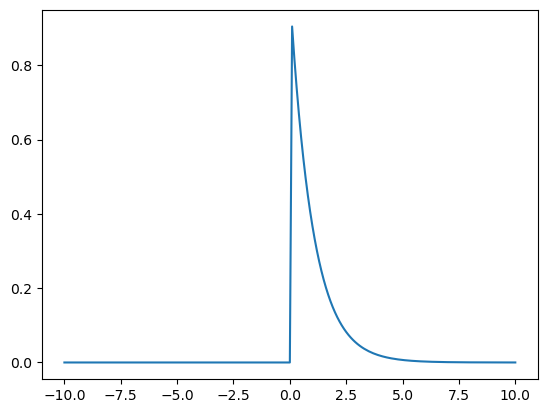

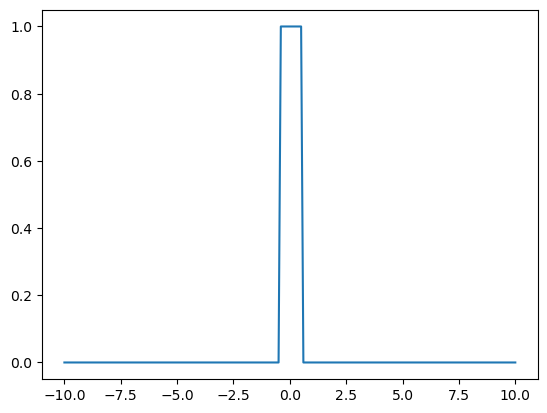

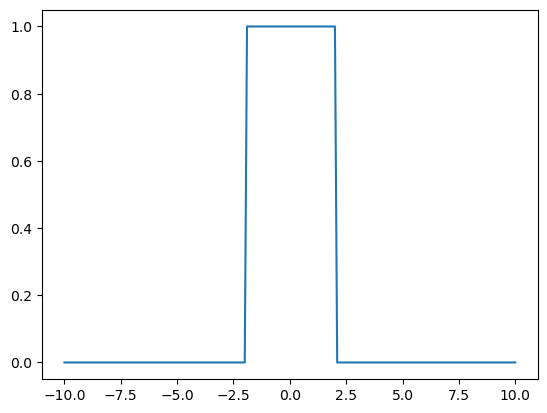

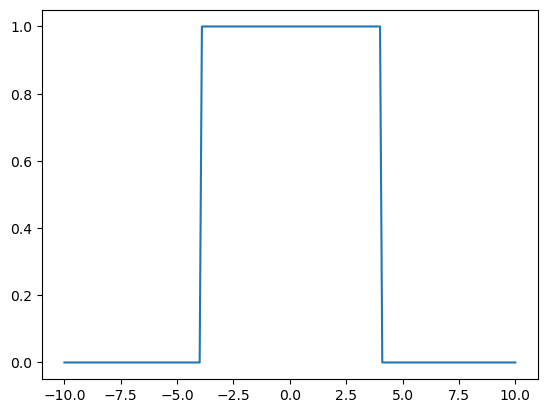

In [25]:
import math
import matplotlib.pyplot as plt

def f1(x):
    if x < 0:
        return 0
    else:
        return math.exp(-x)

def f2(x):
    if x >= -0.5 and x <= 0.5:
      return 1
    else:
      return 0    

def f3(x):
    if x >= -2 and x <= 2:
      return 1
    else:
      return 0  

def f4(x):
    if x >= -4 and x <= 4:
      return 1
    else:
      return 0  

x = []
y1 = []
y2 = []
y3 = []
y4 = []
i = -10

while i < 10:
    x.append(i)
    y1.append(f1(i))
    y2.append(f2(i))
    y3.append(f3(i))
    y4.append(f4(i))
    i += 0.1

plt.figure(1)
plt.plot(x, y1)
plt.figure(2)
plt.plot(x, y2)
plt.figure(3)
plt.plot(x, y3)
plt.figure(4)
plt.plot(x, y4)

**Rješenje:**

In [26]:
from math import atan, cos, inf, sin, sqrt
import numpy as np
from scipy.integrate import quad

def fourier_transform(f, pocetak, kraj, korak):
    W = np.arange(pocetak, kraj, korak)
    F = []
    Theta = []

    for i in range(0, len(W)):
        
        Fr = quad(lambda t : f(t) * cos(W[i] * t), -inf, inf)[0] 
        Fi = -quad(lambda t : f(t) * sin(W[i] * t), -inf, inf)[0]
        F.append(sqrt(pow(Fr,2) + pow(Fi,2)))
        Theta.append(atan(Fi/Fr))

    return W,F,Theta

    
    

Nakon implementacije funkcije <code>fourier_transform</code>, potrebno je biti moguće izvršiti programski kod ispod tako da se dobije prikazani grafički prikaz. 

In [27]:
[W, F1, Theta1] = fourier_transform(f1, -16, 16, 0.1)
[W, F2, Theta2] = fourier_transform(f2, -16, 16, 0.1)
[W, F3, Theta3] = fourier_transform(f3, -16, 16, 0.1)
[W, F4, Theta4] = fourier_transform(f4, -16, 16, 0.1)

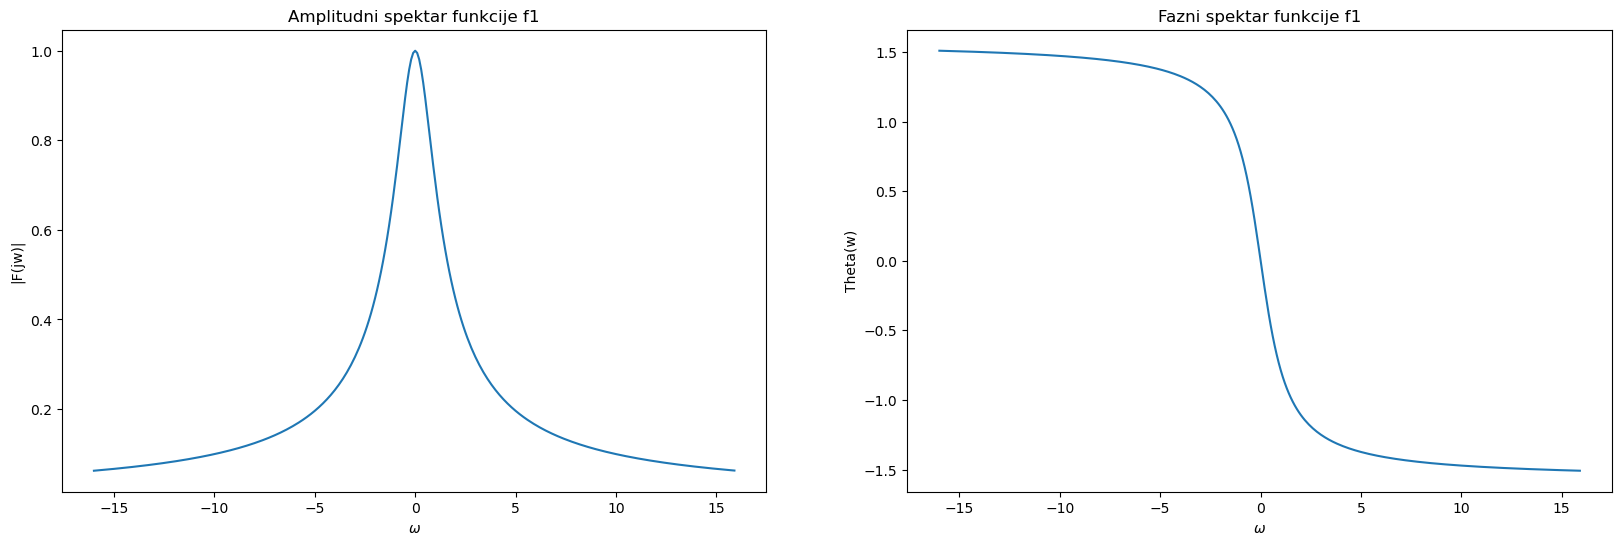

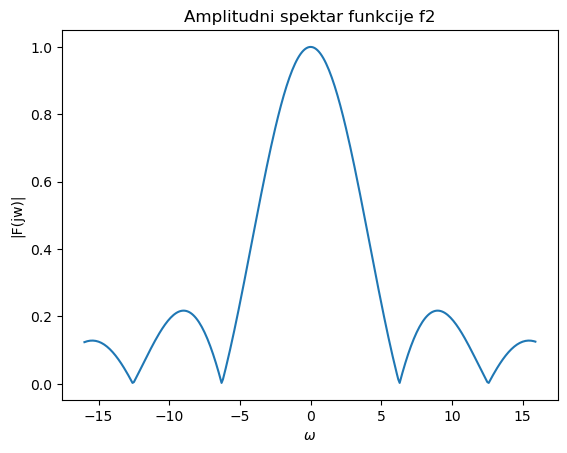

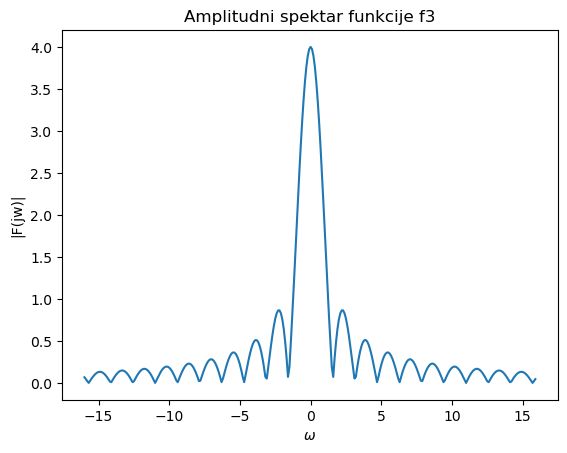

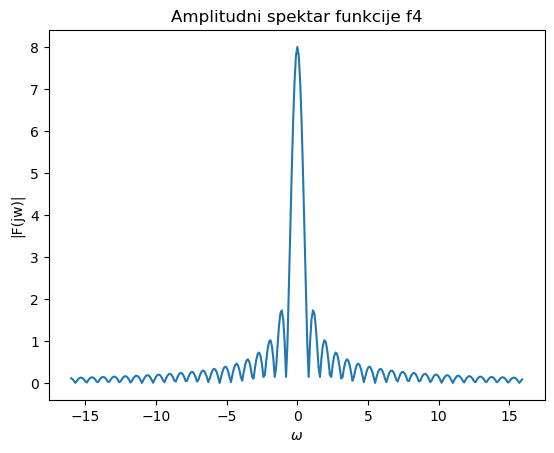

In [28]:
fig, axs = plt.subplots(1,2,figsize=(20,6))
axs[0].set_title("Amplitudni spektar funkcije f1")
axs[1].set_title("Fazni spektar funkcije f1")
axs[0].set_xlabel("$\omega$")
axs[0].set_ylabel("|F(jw)|")
axs[1].set_ylabel("Theta(w)")
axs[1].set_xlabel("$\omega$")
axs[0].plot(W,F1)
axs[1].plot(W,Theta1)
plt.figure(2)
plt.title("Amplitudni spektar funkcije f2")
plt.xlabel('$\omega$')
plt.ylabel('|F(jw)|')
plt.plot(W,F2)
plt.figure(3)
plt.title("Amplitudni spektar funkcije f3")
plt.xlabel('$\omega$')
plt.ylabel('|F(jw)|')
plt.plot(W,F3)
plt.figure(4)
plt.title("Amplitudni spektar funkcije f4")
plt.xlabel('$\omega$')
plt.ylabel('|F(jw)|')
plt.plot(W,F4)